In [ ]:
import pandas as pd
import nltk
import numpy as np

In [ ]:
nltk.download('all')

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer as TT

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/goalearn/phase1_.csv')

In [ ]:
data

,quote,name,tag,likes
0,Two things are infinite: the universe and huma...,Albert Einstein,attributed-no-source|human-nature|humor|infini...,141807
1,The saddest aspect of life right now is that s...,Isaac Asimov,life|science|wisdom,13366
2,The Seven Social Sins are: Wealth without work...,Frederick Lewis Donaldson,character|commerce|conscience|happiness|humani...,12933
3,Never memorize something that you can look up.,Albert Einstein,humor|science,11028
4,"One, remember to look up at the stars and not ...",Stephen Hawking,philosophy|science,8390
...,...,...,...,...
1495,Nothing makes a woman beauty than her belief t...,Bashir F. Biodun,science,2
1496,Nothing is as engaged as a retentive human bra...,Bashir F. Biodun,science,2
1497,God promises neither good life nor good health...,Bashir F. Biodun,science,2
1498,"When asked why he wrote the book, Freed said: ...",Stanley A. Freed,anthropology|history|museums|science,2


In [ ]:
x = data['quote']

In [ ]:
# creating the whole text
T = x[0]
for i in range(1,len(x)):
  T += x[i]
T

In [ ]:
import re
# finding words with ' (like I'm, you'r, ...)
T2 = re.findall('\w+\'\w',T) # notice that after ' comes just one letter

T2

In [ ]:
# finding numbers
T3 = re.findall('\d+',T)

T3

In [ ]:
# finding words
T4 = re.findall('\w{2,}',T)

In [ ]:
T4

In [ ]:
tk = TT()
token = tk.tokenize(T)

In [ ]:
token[100:200]

In [ ]:
# deleting words with '
en = T2

text1 = []
for word in token:
  if word.lower() not in en:
    text1.append(word)

In [ ]:
# deleting numbers
en = T3

text2 = []
for word in text1:
  if word.lower() not in en:
    text2.append(word)

In [ ]:
# gathering (just) words
en = T4

text3 = []
for word in text2:
  if word.lower() in en:
    text3.append(word)

In [ ]:
text3

In [ ]:
# deleting non-important words
en = stopwords.words('english')

text4 = []
for word in text3:
  if word.lower() not in en:
    text4.append(word)

In [ ]:
text4

In [ ]:
# making a complete text (notice that text4 is tokenized)
R = text4[0]
for i in range(1,len(text3)):
  R += ' ' + text3[i]

In [ ]:
R

now, R is the cleaned and text4 is the tokenized cleaned data!

(-0.5, 399.5, 199.5, -0.5)

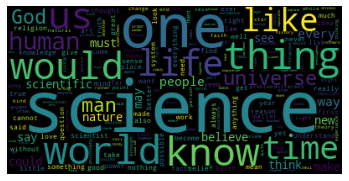

In [ ]:
from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(collocations = False,stopwords=en).generate(R)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

In [ ]:
name = []
count = []
for i in range(0,len(text4)):
  word = text4[i]
  if word not in name:
    name.append(word)
    count.append(1)
  else:
    arg = name.index(word)
    count[arg] += 1

In [ ]:
count1 = np.array(count)
name1 = np.array(name)
name2 = []
for i in range(0,len(count1)):
  argm = np.argmax(count1)
  nam = name1[argm]
  name2.append(nam)
  count1 = np.delete(count1, argm)
  name1 = np.delete(name1, argm)

In [ ]:
count = np.array(count)

In [ ]:
d = {'word': name2, 'count': -np.sort(-count)}
result = pd.DataFrame(data=d)
result

,word,count
0,science,387
1,one,283
2,world,204
3,would,201
4,us,199
...,...,...
9669,1980s,1
9670,anthropologists,1
9671,anthropological,1
9672,delved,1


In [ ]:
from collections import Counter
c = Counter(a)

In [ ]:
result[0:20]

,word,count
0,science,387
1,one,283
2,world,204
3,would,201
4,us,199
5,know,185
6,life,173
7,like,167
8,time,160
9,things,151
